In [ ]:
!pip install causalimpact
!pip install matplotlib


In [ ]:
from causalimpact import CausalImpact
import matplotlib
import urllib.request as urllib2 

In [ ]:
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt
import csv

import numpy as np
import seaborn as sns
from io import StringIO
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 6)

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/datacoe-publicissapient/risingai2020/master/data/CI_data.csv")
df

,Date,Leads,Visits
0,2018-01-01,85080,281190
1,2018-01-02,90769,307769
2,2018-01-03,89874,308381
3,2018-01-04,88722,305694
4,2018-01-05,87307,296190
...,...,...,...
899,2020-06-18,130485,477413
900,2020-06-19,111593,359497
901,2020-06-20,133196,464191
902,2020-06-21,138918,479599


In [ ]:
#df = df.drop(labels=['Date'], axis=0)
df.set_index('Date')

,Leads,Visits
Date,,
2018-01-01,85080,281190
2018-01-02,90769,307769
2018-01-03,89874,308381
2018-01-04,88722,305694
2018-01-05,87307,296190
...,...,...
2020-06-18,130485,477413
2020-06-19,111593,359497
2020-06-20,133196,464191


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Leads              int64
Visits             int64
dtype: object

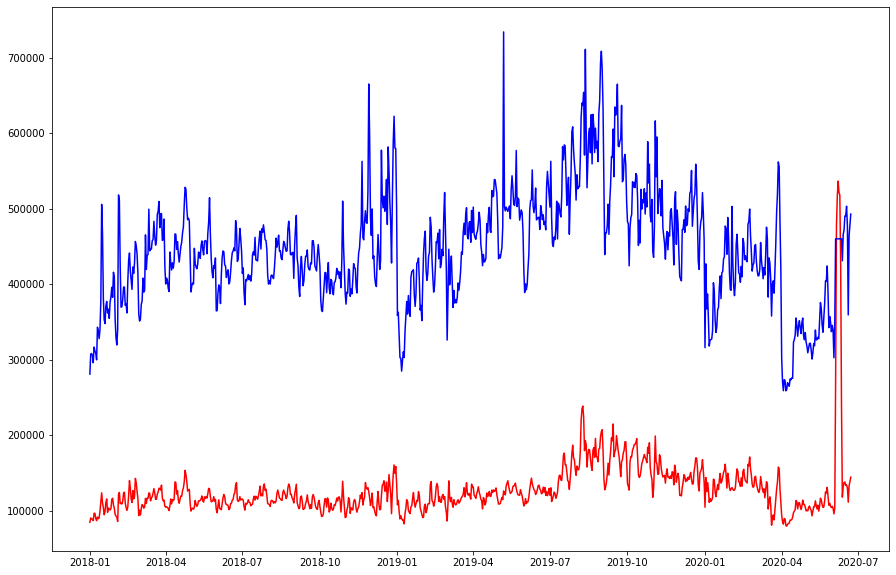

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df['Date'], df['Leads'], 'red')

plt.plot(df['Date'], df['Visits'], 'blue')
plt.show()

In [ ]:
df1 = df.reset_index(drop=True)
df1

,Date,Leads,Visits
0,2018-01-01,85080,281190
1,2018-01-02,90769,307769
2,2018-01-03,89874,308381
3,2018-01-04,88722,305694
4,2018-01-05,87307,296190
...,...,...,...
899,2020-06-18,130485,477413
900,2020-06-19,111593,359497
901,2020-06-20,133196,464191
902,2020-06-21,138918,479599


In [ ]:
df1 = df1.drop(columns=['Date'])
df1 = df1.astype(float)
cut_off_point = 881
pre_period = [0,cut_off_point-1]
post_period = [cut_off_point,df1.shape[0]-1]
print(pre_period)
print(post_period)

[0, 880]
[881, 903]


In [ ]:
impact = CausalImpact(df1, pre_period, post_period)

In [ ]:
impact.run()

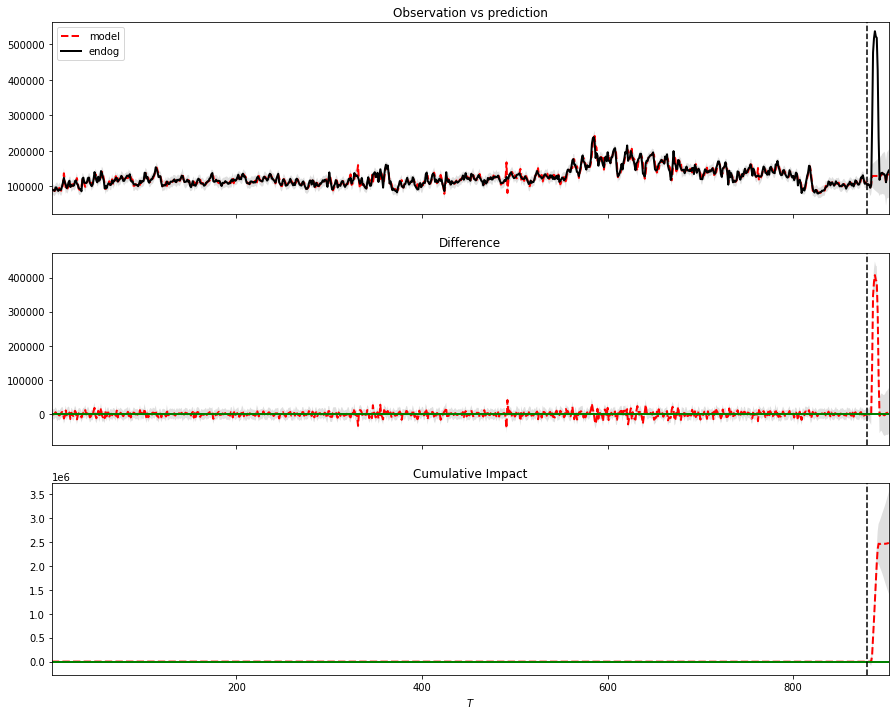

In [ ]:
impact.plot()

In [ ]:
print(impact.summary())

                                Average          Cumulative
Actual                           233427             5368826
Predicted                        125368             2883474
95% CI                  [78838, 171898]  [1813279, 3953669]
                                                           
Absolute Effect                  108058             2485351
95% CI                  [154588, 61528]  [3555546, 1415156]
                                                           
Relative Effect                   86.2%               86.2%
95% CI                  [123.3%, 49.1%]     [123.3%, 49.1%]
                                                           
P-value                            0.0%                    
Prob. of Causal Effect           100.0%                    
None


In [ ]:
impact.summary("report")


 During the post-intervention period, the response variable had an average value of approx. 233427.  By contrast, in
the absence of an intervention, we would have expected an average response of 125368. The 95% interval of this
counterfactual prediction is [78838, 171898]. Subtracting this prediction from the observed response yields an estimate
of the causal effect the intervention had on the response variable. This effect is 108058 with a 95% interval of
[154588, 61528]. For a discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 5368826.  By contrast, had  the intervention not taken
place, we would have expected a sum of 5368826. The 95% interval of this prediction is [1813279, 3953669]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  an incre